In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

from skimage.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Calcular as métricas
def calculate_metrics(original, degraded):
    mse = mean_squared_error(original, degraded)
    ssim_score = ssim(original, degraded, multichannel=True)
    return mse, ssim_score
  
def show_image(image, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# Magnificação
def magnify_image(image, factor):
    """
    Amplia uma imagem por um fator específico.

    Parâmetros:
    image (numpy.ndarray): A imagem a ser ampliada.
    factor (int): O fator de ampliação.

    Retorna:
    numpy.ndarray: A imagem ampliada.

    Raises:
    ValueError: Se o fator de ampliação for menor ou igual a 0.
    """
    if factor <= 0:
        raise ValueError("O fator de ampliação deve ser maior que 0.")
    
    if len(image.shape) == 2:  # Verifica se a imagem é em escala de cinza
        # Adiciona uma dimensão para criar uma imagem RGB fictícia
        image = np.expand_dims(image, axis=2)

    magnified = np.zeros((image.shape[0] * factor, image.shape[1] * factor, image.shape[2]), dtype=image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            magnified[i*factor:(i+1)*factor, j*factor:(j+1)*factor, :] = image[i, j, :]
    return magnified

def contract_image(image, factor):
    """
    Contrai uma imagem por um fator específico.

    Parâmetros:
    image (numpy.ndarray): A imagem a ser contraída.
    factor (int): O fator de contração.

    Retorna:
    numpy.ndarray: A imagem contraída.

    Raises:
    ValueError: Se o fator de contração for menor ou igual a 0.
    """
    if factor <= 0:
        raise ValueError("O fator de contração deve ser maior que 0.")
    
    if len(image.shape) == 2:  # Verifica se a imagem é em escala de cinza
        # Adiciona uma dimensão para criar uma imagem RGB fictícia
        image = np.expand_dims(image, axis=2)

    contracted = np.zeros((image.shape[0] // factor, image.shape[1] // factor, image.shape[2]), dtype=image.dtype)
    for i in range(contracted.shape[0]):
        for j in range(contracted.shape[1]):
            contracted[i, j, :] = image[i*factor, j*factor, :]
    return contracted

def deform_image(image, dx):
    """
    Aplica uma deformação horizontal à imagem.

    Parâmetros:
    image (numpy.ndarray): A imagem a ser deformada.
    dx (int): O deslocamento horizontal a ser aplicado.

    Retorna:
    numpy.ndarray: A imagem deformada.

    Raises:
    ValueError: Se o deslocamento horizontal for maior ou igual ao número de colunas da imagem.
    """
    if dx >= image.shape[1]:
        raise ValueError("O deslocamento horizontal deve ser menor que o número de colunas da imagem.")

    deformed = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if 0 <= j + dx < image.shape[1]:
                deformed[i, j + dx] = image[i, j]
    return deformed

In [17]:
original_image = Image.open('test.png')

original_array = np.array(original_image)

magnification_factor = 2
magnified_image = magnify_image(original_array, magnification_factor)

contraction_factor = 2
contracted_image = contract_image(original_array, contraction_factor)

deformation_dx = 50
deformed_image = deform_image(original_array, deformation_dx)

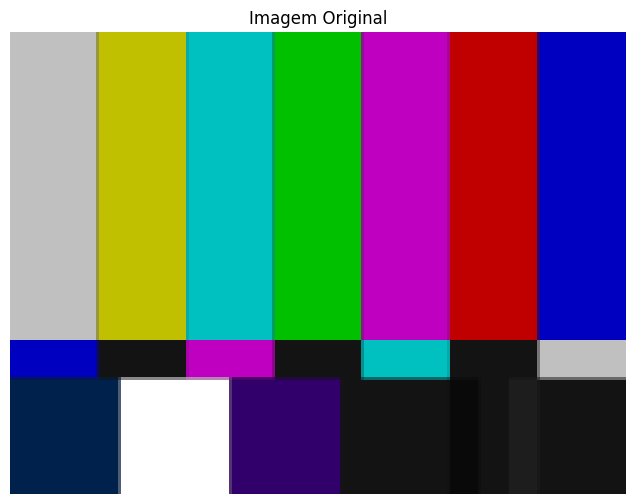

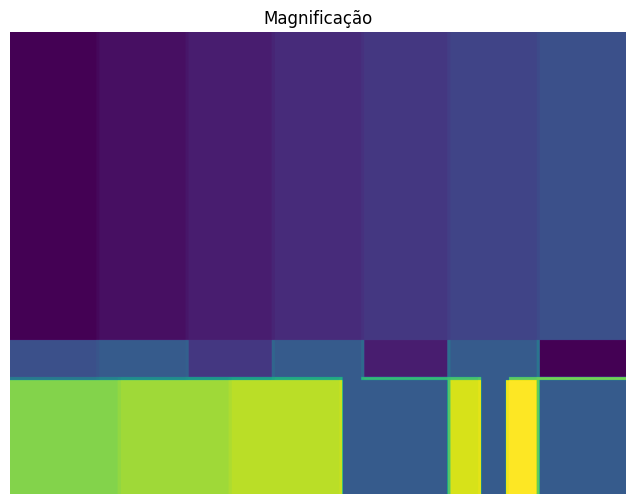

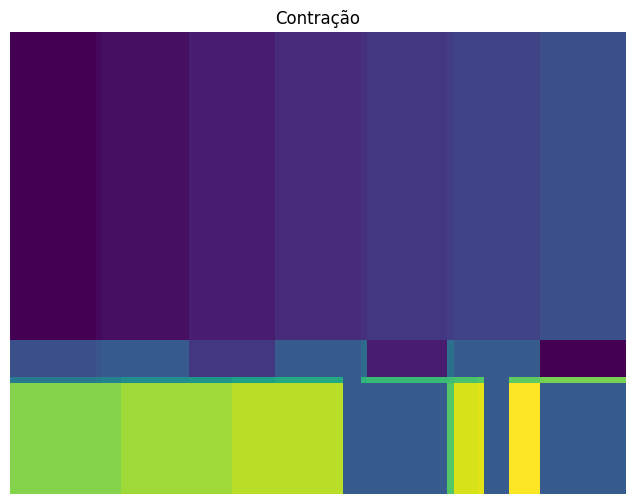

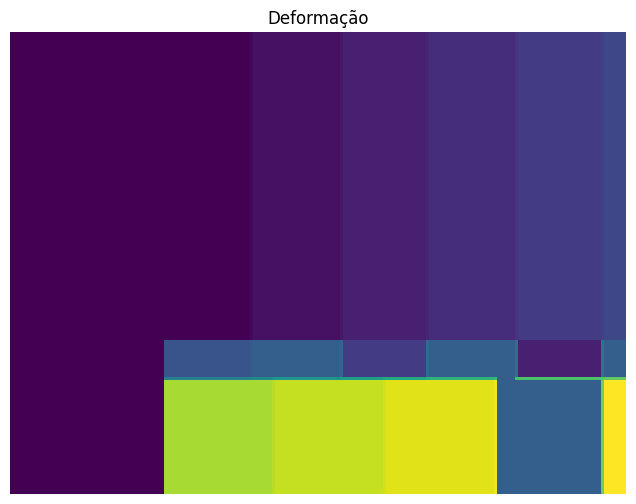

In [18]:
show_image(original_image, "Imagem Original")
show_image(magnified_image, "Magnificação")
show_image(contracted_image, "Contração")
show_image(deformed_image, "Deformação")